# Exploration

## Read data

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import numpy as np

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [38]:
input_interval_file_path = '../data/life_interval_data.csv'
input_total_file_path = '../data/life_total_data.csv'

df_i = pd.read_csv(input_interval_file_path)
df_t = pd.read_csv(input_total_file_path,index_col='date')

# Parse dates and times

def conv_to_timedelta(s):
    # Hack to use pd.to_timedelta
    return pd.to_timedelta(s+':00')

def conv_to_scalar(s):
    return pd.to_timedelta(s+':00').total_seconds()/3600

def timedelta_to_scalar(td):
    return td.total_seconds()/3600

df_i.date = pd.to_datetime(df_i.date)
df_i.start_time = pd.to_datetime(df_i.start_time)

df_i.time = df_i.time.map(conv_to_timedelta)
df_i['end_time'] = df_i.start_time + df_i.time
df_i.time = df_i.time.map(timedelta_to_scalar)

df_t = df_t.applymap(conv_to_scalar)

In [39]:
df_i.head()

,date,time,activity,start_time,end_time
0,2019-05-01,0.250000,prep,2019-05-01 05:20:00,2019-05-01 05:35:00
1,2019-05-01,1.000000,math,2019-05-01 05:35:00,2019-05-01 06:35:00
2,2019-05-01,0.166667,pause,2019-05-01 06:35:00,2019-05-01 06:45:00
3,2019-05-01,1.000000,math,2019-05-01 06:45:00,2019-05-01 07:45:00
4,2019-05-01,1.500000,music,2019-05-01 07:45:00,2019-05-01 09:15:00


In [40]:
df_t.head()

,cook,eat,math,music,pause,prep,sleep,uni,meditation,special,work
date,,,,,,,,,,,
2019-05-01,0.550000,1.766667,3.516667,1.950000,1.216667,5.816667,11.716667,1.633333,0.000000,0.0,0.0
2019-05-02,0.683333,2.450000,6.650000,0.950000,0.516667,1.750000,5.916667,2.833333,0.000000,0.0,0.0
2019-05-03,0.933333,1.950000,0.000000,0.166667,0.866667,3.833333,12.250000,5.750000,0.250000,0.0,0.0
2019-05-04,1.333333,2.066667,2.500000,0.000000,0.000000,1.650000,6.866667,6.450000,0.250000,0.0,0.0
2019-05-05,0.283333,2.300000,2.750000,1.000000,0.000000,5.016667,8.433333,5.283333,0.333333,0.0,0.0


# EDA: Broad overview

## Describe()

In [41]:
df_t.describe()

,cook,eat,math,music,pause,prep,sleep,uni,meditation,special,work
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,0.649462,2.122581,2.273656,0.852151,0.977419,3.835484,8.176344,2.102688,0.241935,0.424731,2.155376
std,0.400312,0.817477,1.962697,0.901046,0.950911,1.957596,2.913178,1.902070,0.474027,2.186592,2.212743
min,0.183333,0.650000,0.000000,0.000000,0.000000,0.750000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.333333,1.616667,0.650000,0.083333,0.291667,2.458333,6.958333,0.000000,0.000000,0.000000,0.000000
50%,0.516667,2.116667,2.050000,0.683333,0.666667,3.600000,8.250000,1.833333,0.000000,0.000000,2.366667
75%,0.908333,2.608333,3.058333,1.025000,1.491667,4.941667,9.566667,3.358333,0.250000,0.000000,3.091667
max,1.733333,3.766667,6.966667,4.166667,4.000000,8.833333,15.600000,6.450000,2.000000,12.166667,10.050000


## Observations

* **cook**
    * I spend around 40min every day with cooking, which is reasonable
* **eat**
    * I was surprised that it takes me a lot more time to eat than to cook. 
    * But this can be explained with me doing something else while eating (like watching news), which then unnecessarily prolongs it.
* **math/uni/work**
    * I spend around 4-5h every day purely with math and university, which is a solid number
    * Since I am also working for >2h every day, this is an acceptable amount (in May, this was primarily Data Science!)
* **sleep**
    * Sleep could be less, but still within reasonable limits
    * I am somewhat worried about the high standard deviation here (3h!)
    * The regularity of my sleep could be better!
* **prep**
    * Here, I included everything from morning routines to sports to reflection to groceries shopping
    * It was to be expected that this takes a lot of time (< 4h)
* **music/meditation/pause**
    * All 0.5h to 1h with relatively low variance
    * They all leave room for improvement, but they all lie within reason

## Total time per activity 

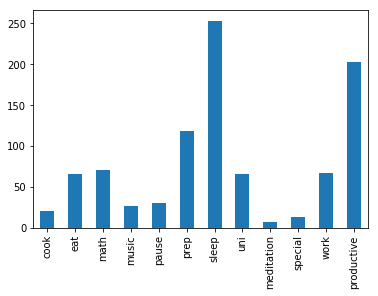

In [42]:
df_t['productive'] = df_t['math'] + df_t['uni'] + df_t['work']
df_t.sum().plot.bar()

## Observations

* I should cut down on eating time and see whether I could optimize the 'prep' column
* Sleep in total is more than productive work, which is disillusioning

## Productive activities over time 

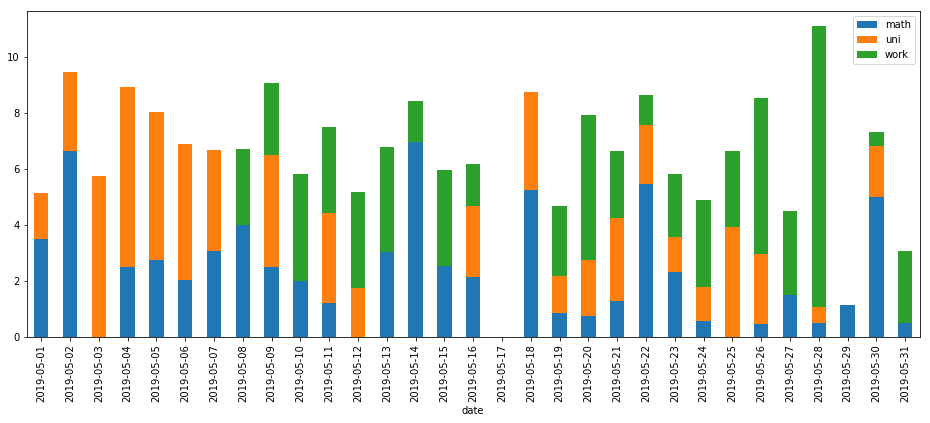

In [43]:
df_t_prod = df_t.filter(['math','uni','work'],axis=1)
df_t_prod.plot.bar(stacked=True,figsize=(16,6))

## Observations

* Relatively consistent work in the first part of the month (if you consider the total)
* University suffered in the second part of the month
* Only one day without work (due to a special occasion)
* Gradual switch from university to work (i.e. learning Data Science)
* Some days, I am very motivated to do math; they stand out (such as 2019-05-14)
* Very productive days are often followed by less productive ones (such as 2019-05-28 and the day after)

# Productivity 

## Total productive time 

In [44]:
col_prod = ['math','uni','work']
df_prod = df_t[col_prod].copy()
df_prod.head()
df_prod['total'] = df_prod.apply(lambda x: x.sum(),axis=1)
df_prod.head()

,math,uni,work,total
date,,,,
2019-05-01,3.516667,1.633333,0.0,5.150000
2019-05-02,6.650000,2.833333,0.0,9.483333
2019-05-03,0.000000,5.750000,0.0,5.750000
2019-05-04,2.500000,6.450000,0.0,8.950000
2019-05-05,2.750000,5.283333,0.0,8.033333


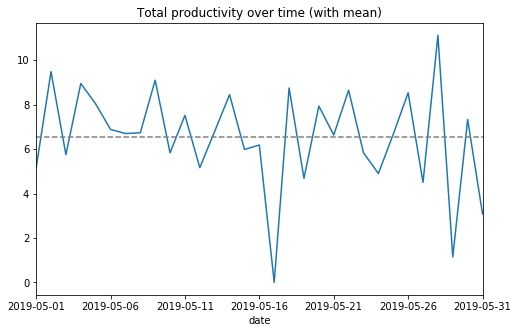

In [59]:
ax = df_prod.total.plot.line(figsize=(8,5),title='Total productivity over time (with mean)')
ax.axhline(df_prod.total.mean(),c='grey',ls='--')

## Observations

* I notice that I am doing a fairly consistent amount of work over time
* Except for two days, I worked for 6-8h every day!

## Productivity per week

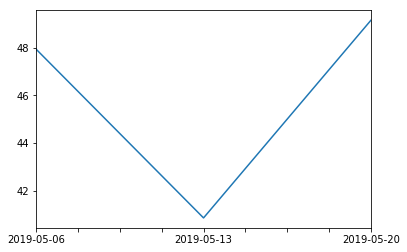

In [46]:
start_day = '2019-05-06'
start_loc = df_prod.index.get_loc(start_day)
prod_by_week = pd.Series()

while True:
    current_week = df_prod.total.iloc[start_loc:start_loc+7]
    if len(current_week) != 7 :
        break
    prod_by_week[df_prod.index[start_loc]] = current_week.sum()
    start_loc += 7

prod_by_week.plot.line()

## Observations

* I worked for around 45h a week in May
* However, for this plot to be meaningful, more data is needed

## Productivity per day-of-week 

In [47]:
df_tmp = df_prod[['total']].copy()
df_tmp['dow'] = df_prod.index.map(lambda x : pd.to_datetime(x).weekday())
df_tmp.head()

,total,dow
date,,
2019-05-01,5.150000,2
2019-05-02,9.483333,3
2019-05-03,5.750000,4
2019-05-04,8.950000,5
2019-05-05,8.033333,6


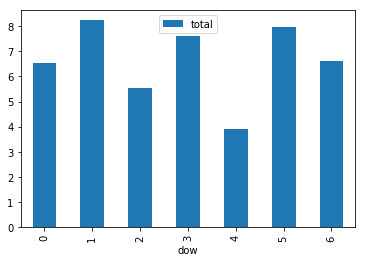

In [48]:
df_tmp.groupby('dow').mean().plot.bar()

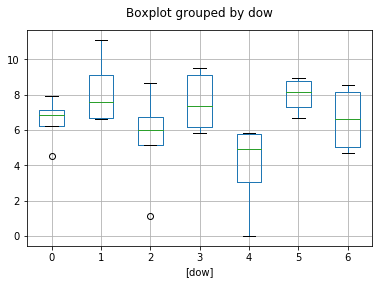

In [49]:
ax = df_tmp.boxplot(by='dow')
ax.set_title('')
ax

## Observations

* My productivity varies greatly depending on the day of the week
* Tuesdays and Thursdays are a lot more productive than Wednesdays and Fridays
* It is surprising that the second most productive day is Saturday!

## Violation: working after 8pm 

I try to stop working at 8pm. On some days, I overstep that rule. The following graph displays the exact amount of overtime.

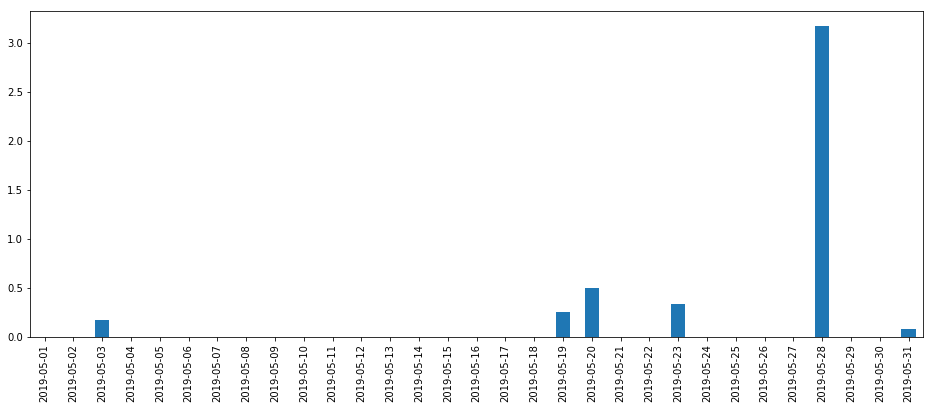

In [50]:
work_activities = ['self','uni','work']

s_overtime = pd.Series()

for day in df_i.date.unique():
    deadline = pd.to_datetime(day)+pd.to_timedelta('20h')
    tot = 0
    over_deadline = df_i[(df_i.date==day) & (df_i.activity.isin(work_activities)) & (df_i.end_time > deadline)]
    for i,row in over_deadline.iterrows():
        if row.start_time > deadline:
            tot += row.time
        else:
            tot += timedelta_to_scalar(row.end_time - deadline)
    s_overtime[pd.to_datetime(day).strftime('%Y-%m-%d')] = tot
    
s_overtime.plot.bar(figsize=(16,6))

## Observation

* It seems that I barely ever violate this rule
* And if so, then only by less than 1h (except for one day)!

# Eat and cook

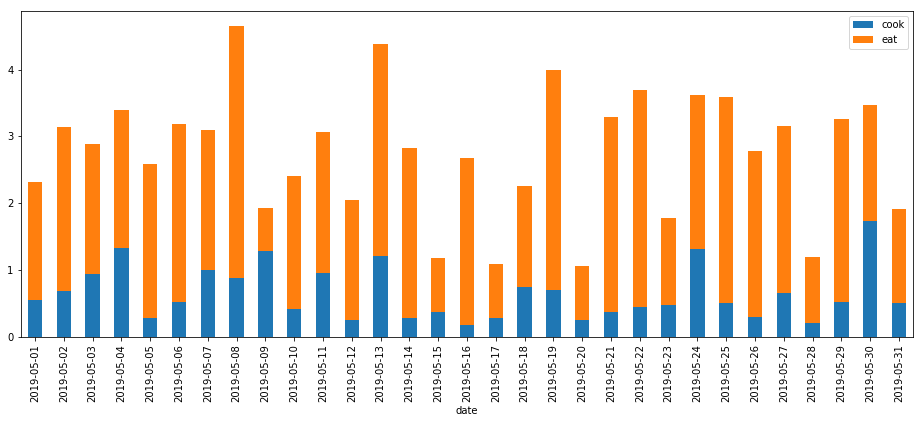

In [51]:
df_food = df_t.copy().filter(['cook','eat'],axis=1)
df_food.plot.bar(stacked=True, figsize=(16,6))

## Observations

* I cook little on most days, except for those when I prepare meals for days to come (e.g. 2019-05-24)
* Eating time is quite high, but this is because I generally do something else while eating

0.4838709677419355


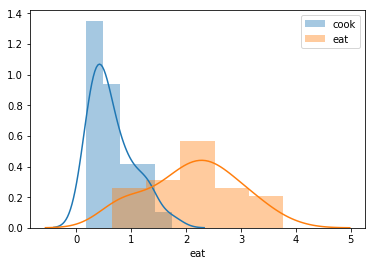

In [52]:
sns.distplot(df_food.cook,label='cook')
sns.distplot(df_food.eat,label='eat')

print((df_food.cook <= 0.5).sum()/len(df_food))
plt.legend()

## Observation

* On around half of days (48%), I spend less than 30min on cooking
* The most frequently occurring eating time is 2-2.5h, which is probably split on 1h for lunch and 1h for dinner

## Entertainment 

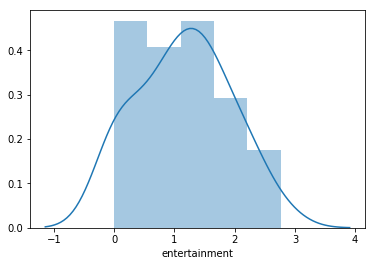

In [53]:
# Assume: eating alone would take 1h every day
eat_entertainment = df_t.eat.map(lambda x: max(0, x-1))
eat_entertainment.name = 'entertainment'
sns.distplot(eat_entertainment)

count    31.000000
mean      2.981720
std       1.151491
min       0.650000
25%       2.266667
50%       2.916667
75%       3.725000
max       5.400000
dtype: float64


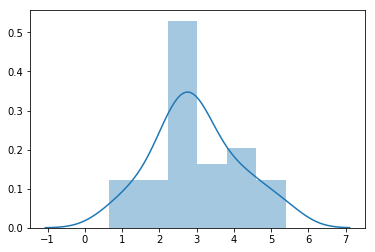

In [54]:
all_entertainment = eat_entertainment + df_t.pause + df_t.music
print(all_entertainment.describe())
sns.distplot(all_entertainment)

## Observations

* First chart
    * From the data on eating times, we can roughly conclude that I spend 0-2.5h on things other than eating
* Second chart
    * If we sum this data with 'pause' and 'music', the result is roughly the total amount of entertainment
    * Which is quite stable at 2-2.5h (for >50% of days)
    * The relatively low variance can be explained by the fact that one type of entertainment (e.g. music) typically makes another type unnecessary (e.g. pause); in the end, they add up to roughly the same amount
    * This data also shows that there is room for improvement

# Sleep

Calculate the duration of the **main** sleep cycle, excluding naps

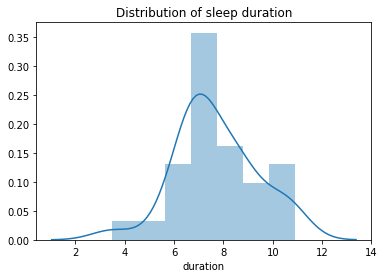

In [55]:
df_sleep = pd.DataFrame(columns=['start','end','duration'])

days = df_t.index

for i,day in enumerate(days):

    # We only know the end time of sleep for days where we have data for the next day, too
    # So, exclude the last one

    if i == len(days)-1:
        df_sleep.loc[day] = [np.nan,np.nan,np.nan]
        continue
    
    # Get last activity of the day (which should be sleep)
    last_activity = df_i[df_i.date==day]
    if not len(last_activity):
        df_sleep.loc[day] = [np.nan,np.nan,np.nan]
        continue
    last_activity = last_activity.iloc[-1]
    
    if last_activity.activity != 'sleep':
        df_sleep.loc[day] = [np.nan,np.nan,np.nan]
        continue
    
    # Get the first activity of the next day
    first_activity = df_i[df_i.date==days[i+1]]
    if not len(first_activity):
        df_sleep.loc[day] = [np.nan,np.nan,np.nan]
        continue
    first_activity = first_activity.iloc[0]
    
    # Calculate start and end of sleep
    sleep_start = last_activity.start_time
    sleep_end = first_activity.start_time
    duration = timedelta_to_scalar(sleep_end-sleep_start)
    df_sleep.loc[day] = [sleep_start, sleep_end, duration]

plt.title('Distribution of sleep duration')
sns.distplot(df_sleep.duration.dropna())

## Observations

* On most days, I sleep around 6.5-7h, which is approximately the recommended sleeping time
* On some days, I sleep too much (> 10h)
* It would be desirable to have more consistency (and lower variance)

## Nap time 

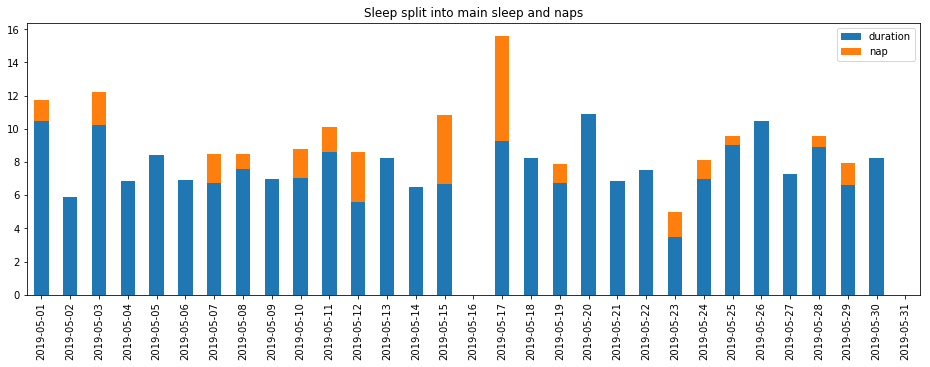

In [56]:
# Nap time = all time spent sleeping except the main sleeping time

s_nap_time = df_t.sleep - df_sleep.duration
df_sleep['nap'] = s_nap_time

df_sleep.filter(['duration','nap'],axis=1).plot.bar(stacked=True,figsize=(16,5),title='Sleep split into main sleep and naps')

## Violations: Going to bed later than 10:30pm

I try to go to bed at 10:30pm. How often and by how much do I violate this rule?

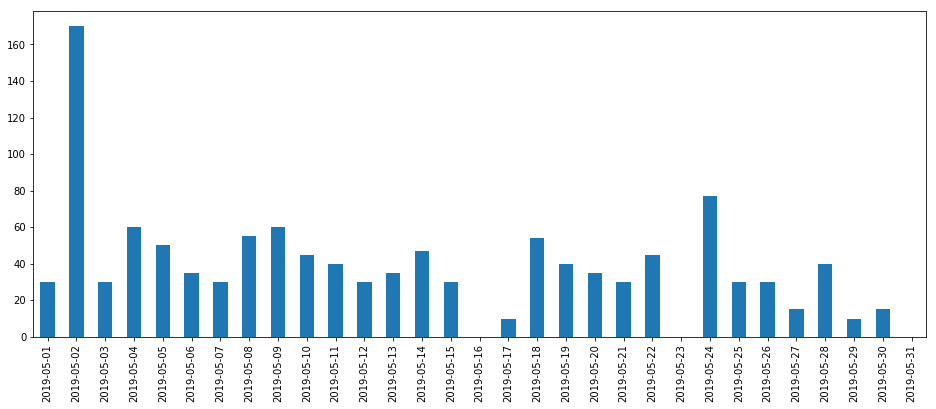

In [57]:
optimal_time = [pd.to_datetime(i)+pd.to_timedelta('22h 30min') for i in df_sleep.index]
violation = df_sleep.start - pd.Series(optimal_time,index=df_sleep.index)
violation = violation.map(timedelta_to_scalar)*60
violation.plot.bar(figsize=(16,6))

## Observations

* I still struggle follow it by the letter, but in the past month, I went to bed before 11pm nearly every day

## Hypothesis: More sleep => higher productivity

Hypothesis: If I have slept more the day before (i.e. the main sleep cycle was longer), then my productivity on the current day tends to be higher
* Idea: If you sleep for a long time, this replenishes your energy reserves, which makes you more productive
* **This turned out to be wrong: Sleep and productivity are not correlated!**

In [58]:
df_tmp = df_prod[['total']].copy()
for i in range(len(df_tmp)):
    if i == 0:
        continue
    df_tmp.loc[df_tmp.index[i],'prev_sleep'] = df_sleep.iloc[i-1].duration
df_tmp.head()
df_tmp.corr()

,total,prev_sleep
total,1.000000,0.067909
prev_sleep,0.067909,1.000000


# Consequences

* This analysis confirms most of the intuitions that I had
* However, one pattern that surprised me was the inconsistency of my sleep time and the need to compensate it during the day with naps
* This probably is related to not going to bed on time
* One probable cause of this is eating dinner too late
* The usual time that I eat dinner is between 7pm and 8pm
* **As a real-life consequence of this data analysis, I am having dinner one hour earlier from now on!**